In [42]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

In [101]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=42)

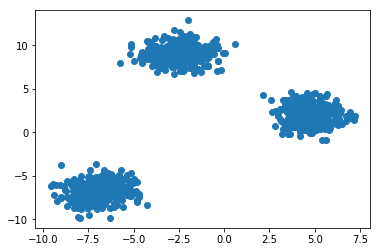

In [102]:
plt.scatter(X[:, 0], X[:, 1])

In [103]:
from sklearn.cluster import KMeans

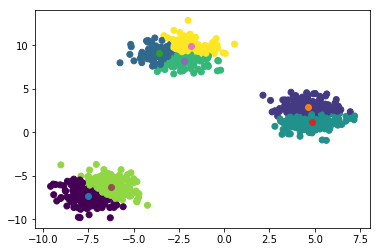

In [104]:
model = KMeans(7)

model.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=model.labels_)

for center in model.cluster_centers_:
    plt.scatter(center[0], center[1])

In [105]:
model.cluster_centers_

array([[-7.49913814, -7.31371906],
       [ 4.62462165,  2.86579935],
       [-3.61310965,  9.16059793],
       [ 4.83975299,  1.18998887],
       [-2.19342322,  8.17032366],
       [-6.23017623, -6.2534856 ],
       [-1.84994308,  9.94453194]])

In [108]:
class CustomKMeans:
    
    def __init__(self, n_clusters, n_init=10, max_iter=5):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        
    def fit(self, X):
        self.X = X
        
        procs = []
        
        for proc in range(self.n_init):
            
            clusters = []
            for i in range(self.n_clusters):
                clusters.append(Cluster(random.choice(X)))

            for iter in range(self.max_iter):

                labels = []
                error = 0

                for point in X:

                    distances = []
                    for cluster in clusters:
                        distance = cluster.distance(point)
                        distances.append((distance, cluster))

                    best_index = np.array(distances)[:, 0].argmin()
                    best_cluster = distances[best_index][1]

                    best_cluster.points.append(point)
                    labels.append(best_index)
                    error += distances[best_index][0]


                for cluster in clusters:
                    cluster.reset_center()


            result = {"labels":labels, "clusters":clusters, "error" : error}

            procs.append((error, result))
        
        dict_index = np.array(procs)[:, 0].argmin()
        
        dict_best = procs[dict_index][1]
        
        self.labels_ = dict_best["labels"]
        self.clusters_ = dict_best["clusters"]
        self.error_ = dict_best["error"]
        

class Cluster:
    
    def __init__(self, center):
        self.center = center
        self.points = []
        
    def reset_center(self):
        self.center = np.mean(self.points, axis=0)
        self.points = []
        
    def distance(self, point):
        return np.sum((self.center - point)**2)
        
        

In [110]:

errors =[]

for k in range(1, 6):
    m2 = CustomKMeans(k)
    m2.fit(X)
    errors.append(m2.error_)

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [98]:
plt.plot()

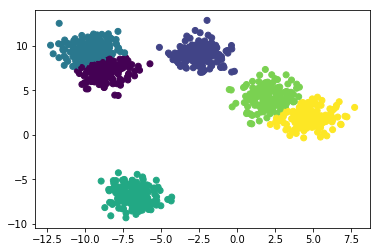

In [99]:
plt.scatter(X[:, 0], X[:, 1], c=m2.labels_)

In [95]:
! push "L 7"

[master 619b523] L 7
 1 file changed, 103 insertions(+), 36 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 24.98 KiB | 8.33 MiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/coding-blocks-archives/ML-Noida-2019-Aug.git
   ad87a6c..619b523  master -> master


In [79]:
sorted?